In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

In [ ]:
# 1. Connect to Database
db_connection_str = 'mysql+pymysql://root:***********@********/sales_db'
db_connection = create_engine(db_connection_str)

def run_query(query):
    return pd.read_sql(query, db_connection)

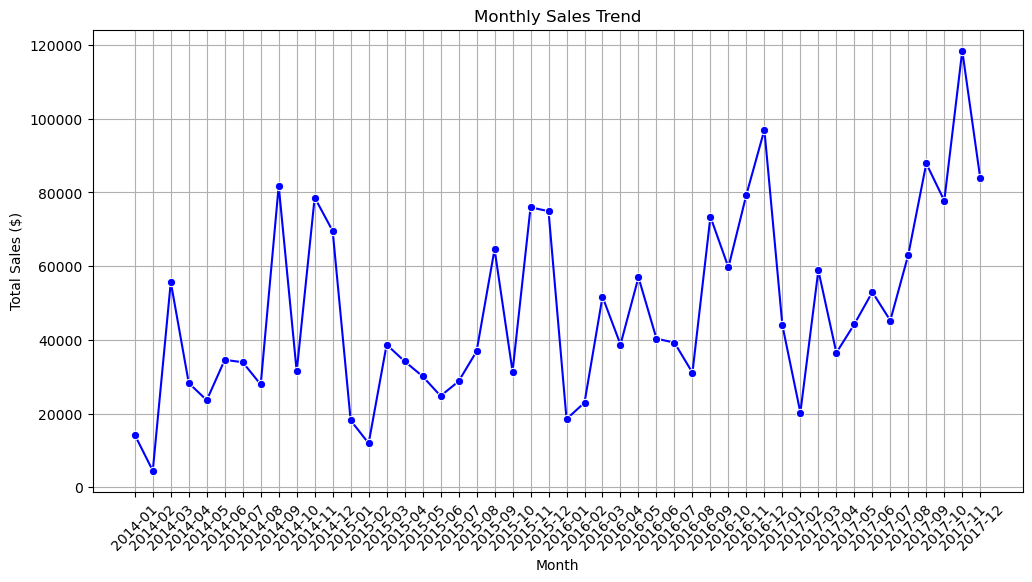

In [3]:
# ------------------------------------------------------
# VISUALIZATION 1: Monthly Sales Trend (Line Chart)
# ------------------------------------------------------
query_trend = """
SELECT DATE_FORMAT(order_date, '%%Y-%%m') AS month_year, SUM(sales) AS monthly_sales
FROM retail_sales
GROUP BY month_year
ORDER BY month_year;
"""
df_trend = run_query(query_trend)

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_trend, x='month_year', y='monthly_sales', marker='o', color='b')
plt.xticks(rotation=45)
plt.title('Monthly Sales Trend')
plt.ylabel('Total Sales ($)')
plt.xlabel('Month')
plt.grid(True)
plt.show()

C:\Users\Yahya\AppData\Local\Temp\ipykernel_10524\3085995820.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_cat, x='category', y='total_sales', palette='viridis')


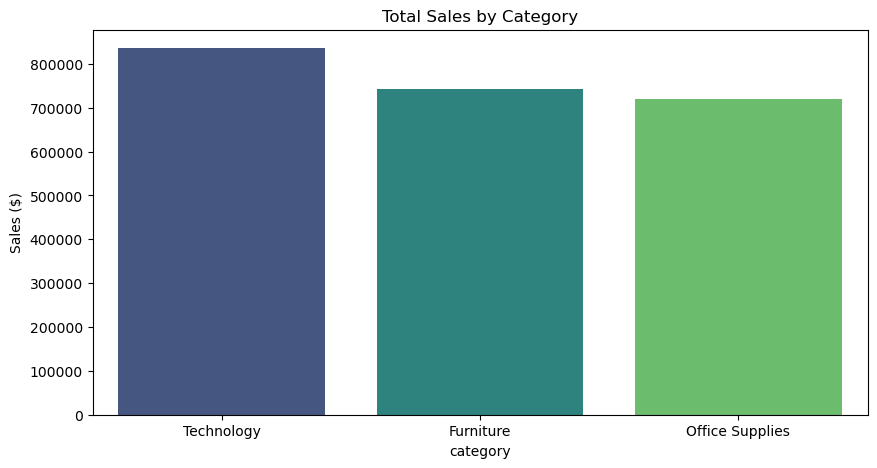

In [4]:
# ------------------------------------------------------
# VISUALIZATION 2: Sales by Category (Bar Chart)
# ------------------------------------------------------
query_cat = """
SELECT category, SUM(sales) AS total_sales
FROM retail_sales
GROUP BY category
ORDER BY total_sales DESC;
"""
df_cat = run_query(query_cat)

plt.figure(figsize=(10, 5))
sns.barplot(data=df_cat, x='category', y='total_sales', palette='viridis')
plt.title('Total Sales by Category')
plt.ylabel('Sales ($)')
plt.show()

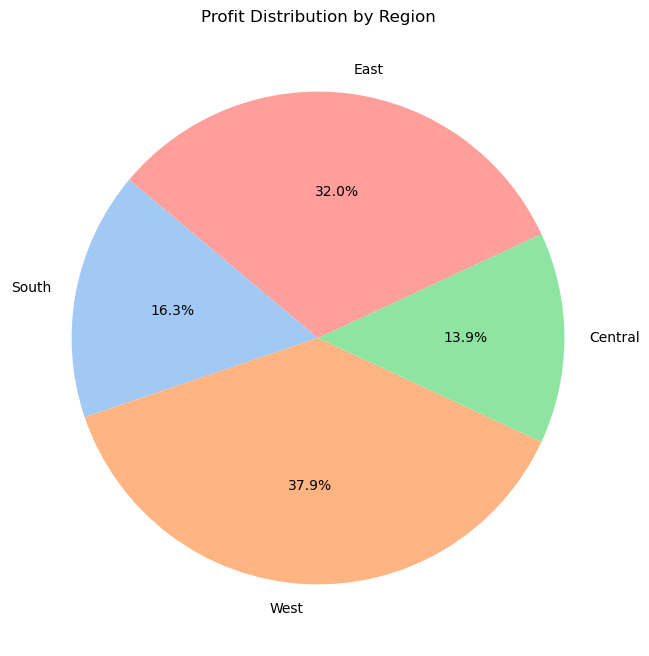

In [5]:
# ------------------------------------------------------
# VISUALIZATION 3: Profit by Region (Pie Chart)
# ------------------------------------------------------
query_region = """
SELECT region, SUM(profit) AS total_profit
FROM retail_sales
GROUP BY region;
"""
df_region = run_query(query_region)

plt.figure(figsize=(8, 8))
plt.pie(df_region['total_profit'], labels=df_region['region'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Profit Distribution by Region')
plt.show()